In [1]:
from path_cover import *

In [2]:
from pytket import Circuit
from pytket.circuit.display import get_circuit_renderer, render_circuit_jupyter, view_browser

circuit_renderer = get_circuit_renderer() # Instantiate a circuit renderer
circuit_renderer.config.render_options.condense_c_bits = True # You can also set the properties on the instance directlyprint("Render options:")
circuit_renderer.set_render_options(zx_style=True, min_height="500px") # Configure render options
print(circuit_renderer.get_render_options()) # View currently set render options

circuit_renderer.save_render_options()  # Export current render options to the pytket config

{'zx_style': True, 'condense_c_bits': True}


In [3]:
def demo(n_lines, n_more_edges):
    G = gen_graph(n_lines=n_lines, n_more_edges=n_more_edges)
    
    print(f"Generated graph with {len(G.nodes())} nodes and "
          f"{len(G.edges())} edges")
    print("Nodes:", list(G.nodes()))
    print("Edges:", list(G.edges()))

    path_cover = find_path_cover(G)
    
    if path_cover:
        for i, path_edges in enumerate(path_cover):
            print(f"  Path {i+1}: {path_edges}")
    
    visualize_graph(G, path_cover)
    return G, path_cover

Generated graph with 14 nodes and 14 edges
Nodes: [6, 0, 5, 3, 9, 1, 4, 12, 7, 11, 2, 10, 13, 8]
Edges: [(6, 0), (0, 5), (0, 12), (5, 3), (3, 9), (3, 13), (9, 2), (9, 1), (4, 12), (12, 7), (11, 2), (2, 10), (10, 13), (13, 8)]
No path cover found with 1 paths
No path cover found with 2 paths
Path cover with 3 paths found (11 edges)
  Path 1: [(0, 6), (0, 5), (1, 9), (3, 5), (3, 9)]
  Path 2: [(2, 10), (2, 11), (8, 13), (10, 13)]
  Path 3: [(4, 12), (7, 12)]


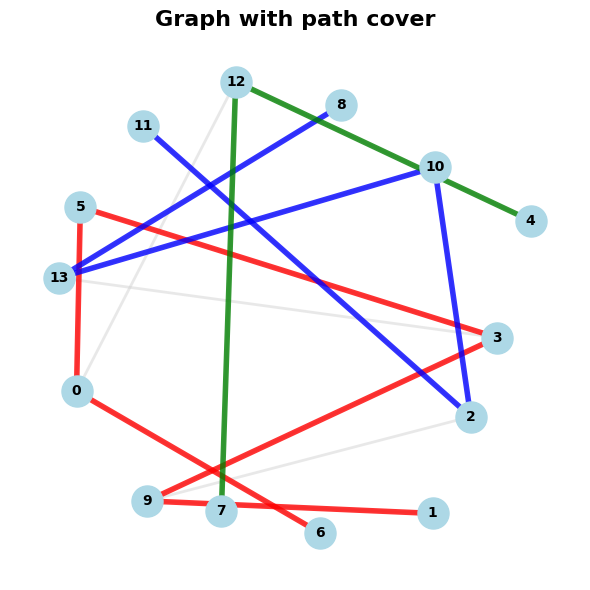

In [4]:
G, path_cover = demo(n_lines=4, n_more_edges=3)

In [5]:
circ = extract_circuit(G, path_cover)

In [6]:
circuit_renderer.set_render_options(min_height="300px")
render_circuit_jupyter(circ)

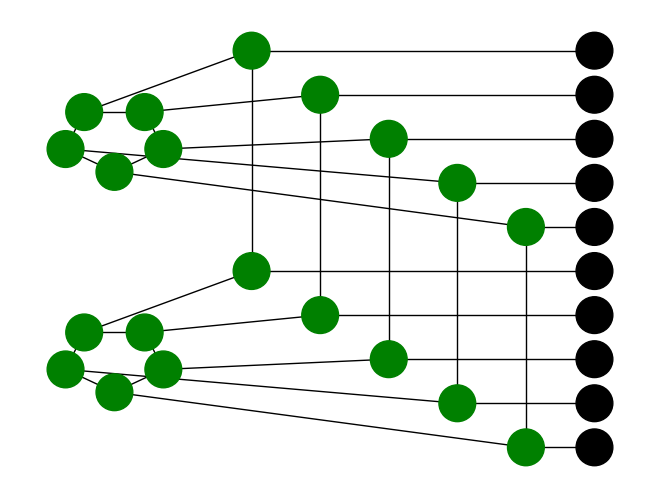

In [7]:
import pyzx as zx
from pyzx import VertexType, EdgeType, Graph
from fault_equivalent_rewrites import *


def generate_zx_graph(N: int, W: int) -> BaseGraph:
    """
    Generates a ZX-diagram graph for the given N and W parameters.
    N can be any integer.
    """
    g = zx.Graph()
    # The position is calculated to keep the graph centered.
    v = g.add_vertex(VertexType.Z, (N - 1) / 2, 0)

    # Add N boundary vertices and connect them to the central spider
    for i in range(N):
        nv = g.add_vertex(VertexType.BOUNDARY, i, 1)
        g.add_edge((v, nv))

    if recursive_unfuse_FE(g, v, w=W):
        return g
    else:
        return None


def zx_diagram_to_networkx_graph(graph):
    graph_dict = graph.to_dict()
    G = nx.Graph()
    pos = {}
    node_types = {}
    for v_data in graph_dict['vertices']:
        G.add_node(v_data['id'])
        pos[v_data['id']] = v_data['pos']
        node_types[v_data['id']] = v_data['t']
    for u, v, _ in graph_dict['edges']:
        G.add_edge(u, v)
    return G, pos, node_types


N = 10
graph = generate_zx_graph(10, None)
G, pos, node_types = zx_diagram_to_networkx_graph(graph)
node_colors = ['green' if node_types[n] == VertexType.Z else 'black' for n in G.nodes()]
nx.draw(G, pos, node_color=node_colors, font_color='white', node_size=700)

No path cover found with 1 paths
No path cover found with 2 paths
No path cover found with 3 paths
No path cover found with 4 paths
Path cover with 5 paths found (25 edges)


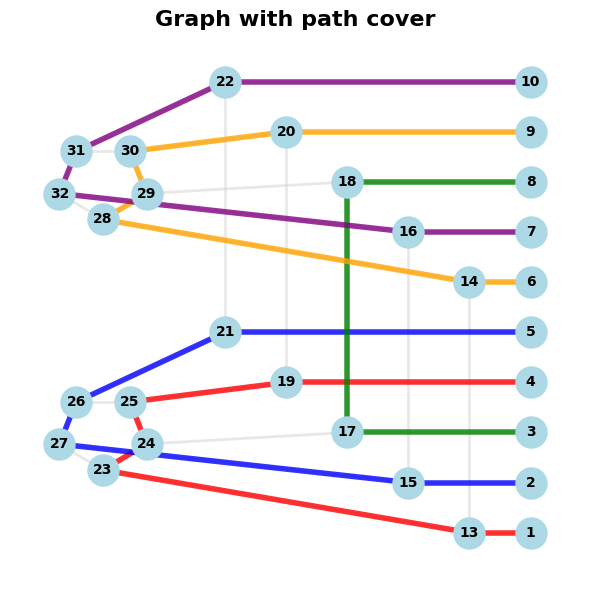

In [8]:
path_cover = find_path_cover(G)
visualize_graph(G, path_cover, pos)

In [11]:
circ = extract_circuit(G, path_cover)
render_circuit_jupyter(circ)

In [10]:
# view_browser(circ)